In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
loans_df = pd.read_csv('loan_data.csv')

In [5]:
loans_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
loans_df.isna().count()

credit.policy        9578
purpose              9578
int.rate             9578
installment          9578
log.annual.inc       9578
dti                  9578
fico                 9578
days.with.cr.line    9578
revol.bal            9578
revol.util           9578
inq.last.6mths       9578
delinq.2yrs          9578
pub.rec              9578
not.fully.paid       9578
dtype: int64

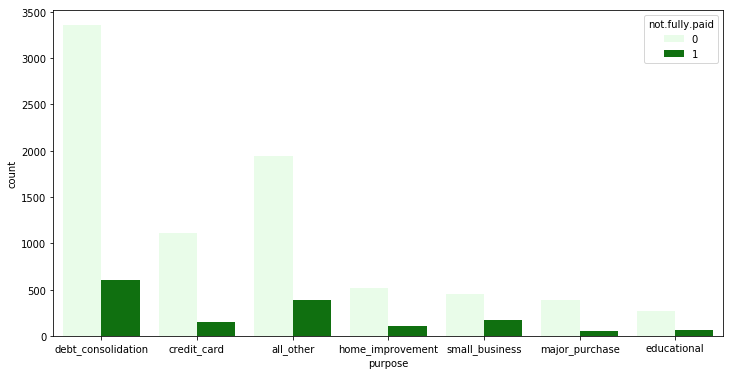

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans_df,color='g')

C:\Users\Lekshmi\AppData\Local\conda\conda\envs\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


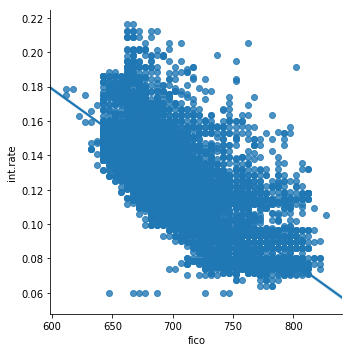

In [24]:
sns.lmplot('fico','int.rate', data=loans_df)

C:\Users\Lekshmi\AppData\Local\conda\conda\envs\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


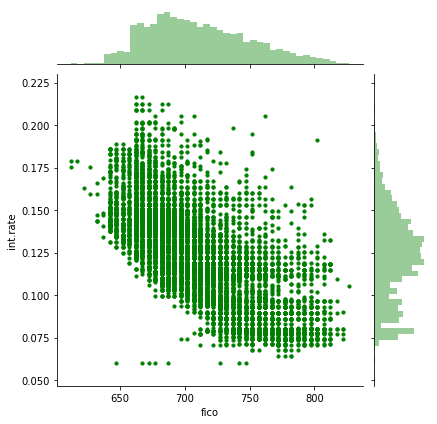

In [26]:
sns.jointplot('fico','int.rate', data=loans_df,color='g',s=10)

C:\Users\Lekshmi\AppData\Local\conda\conda\envs\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


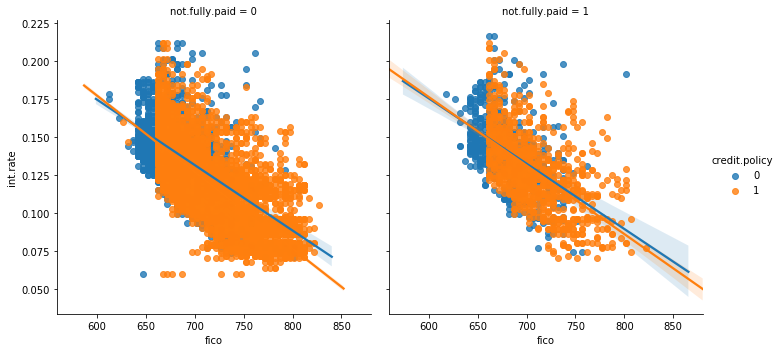

In [30]:
sns.lmplot(x='fico', y='int.rate', col='not.fully.paid',
           hue='credit.policy', data=loans_df,height=5, aspect=1)

In [36]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [48]:
loans_df.select_dtypes(include='O').columns

Index(['purpose'], dtype='object')

In [49]:
def factorize_df(dataframe):
    dataframe = pd.DataFrame(dataframe)
    cat_columns = dataframe.select_dtypes(include='O').columns
    indices = {}
    for col in cat_columns:
        factorized_col,index = pd.factorize(dataframe[col])
        dataframe[col] = factorized_col
        indices[col] = index
    return dataframe,indices        

In [50]:
factorize_df(loans_df)

(      credit.policy  purpose  int.rate  installment  log.annual.inc    dti  \
 0                 1        0    0.1189       829.10       11.350407  19.48   
 1                 1        1    0.1071       228.22       11.082143  14.29   
 2                 1        0    0.1357       366.86       10.373491  11.63   
 3                 1        0    0.1008       162.34       11.350407   8.10   
 4                 1        1    0.1426       102.92       11.299732  14.97   
 5                 1        1    0.0788       125.13       11.904968  16.98   
 6                 1        0    0.1496       194.02       10.714418   4.00   
 7                 1        2    0.1114       131.22       11.002100  11.08   
 8                 1        3    0.1134        87.19       11.407565  17.25   
 9                 1        0    0.1221        84.12       10.203592  10.00   
 10                1        0    0.1347       360.43       10.434116  22.09   
 11                1        0    0.1324       253.58

In [51]:
loans_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [52]:
X = loans_df.drop(['not.fully.paid'],axis=1)

In [55]:
y = loans_df['not.fully.paid']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
model_dt = DecisionTreeClassifier()

In [58]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
y_pred = model_dt.predict(X_test)

In [60]:
print(confusion_matrix(y_test,y_pred))

[[2027  404]
 [ 341  102]]


In [61]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.86      0.83      0.84      2431
          1       0.20      0.23      0.21       443

avg / total       0.76      0.74      0.75      2874



In [62]:
model_rf = RandomForestClassifier(n_estimators=100)

In [63]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
y_pred_rfc = model_rf.predict(X_test)

In [65]:
print(confusion_matrix(y_test,y_pred_rfc))

[[2423    8]
 [ 435    8]]


In [66]:
print(classification_report(y_test,y_pred_rfc))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.50      0.02      0.03       443

avg / total       0.79      0.85      0.78      2874

